In [9]:
import tensorflow as tf
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [10]:
AUTO = tf.data.experimental.AUTOTUNE
ignore_order = tf.data.Options()
ignore_order.experimental_deterministic = False

def trans_data(dataset):
    def _parse_function(example_proto):
        feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string, default_value=''),
        'label': tf.io.FixedLenFeature([], tf.string, default_value=''),
        }
        return tf.io.parse_single_example(example_proto, feature_description)

    def parse_data(dataset):
        x = tf.io.parse_tensor(dataset['image'], tf.int16)
        y = tf.io.parse_tensor(dataset['label'], tf.int16)
        return x, y

    def reshape(x, y):
        X = tf.reshape(x, [16, 160, 160])
        Y = tf.reshape(y, [])
        return X, Y
    

    dataset = dataset.map(_parse_function, num_parallel_calls=AUTO)
    dataset = dataset.map(parse_data, num_parallel_calls=AUTO)
    dataset = dataset.map(reshape, num_parallel_calls=AUTO)
    #dataset = dataset.map(normalize_data, num_parallel_calls=AUTO)
    #dataset = dataset.batch(config.batch_size)
    return dataset

In [11]:
filenames = tf.data.Dataset.list_files(str(r'E:\processed_data\in_distribute_four_out_center_single\*.tfrecord'))
mainset = tf.data.TFRecordDataset(filenames, compression_type='GZIP', num_parallel_reads=AUTO)
mainset = mainset.with_options(ignore_order)
dataset = trans_data(mainset).prefetch(AUTO)

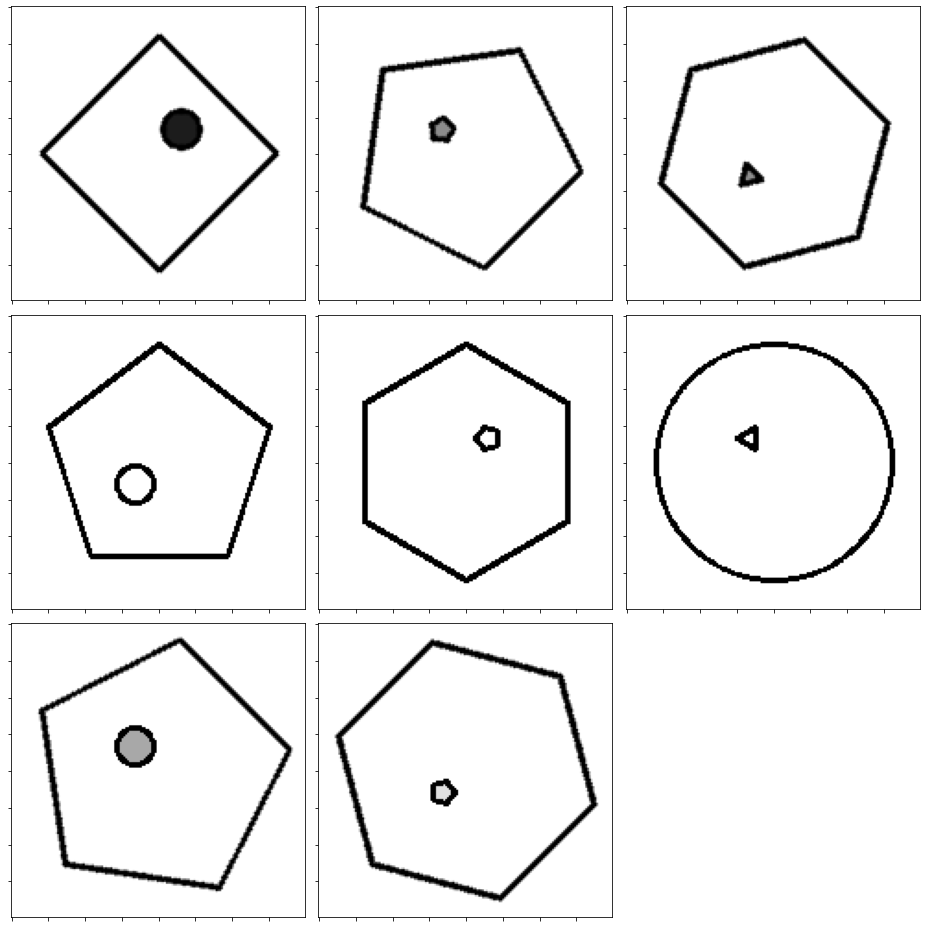

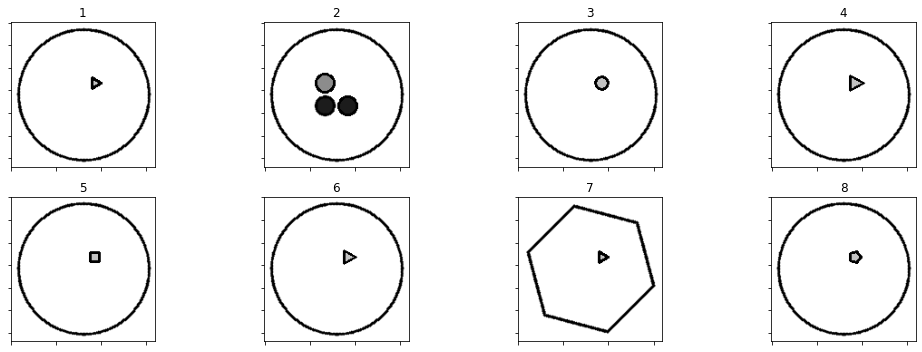




Die richtige Antwort ist:  1


In [12]:
for data, target in dataset.take(1):
    #plot questions
    fig=plt.figure(figsize=(13, 13))
    for count in range(8):
        im = fig.add_subplot(3, 3, count + 1 )
        #äim.axis('off')
        im.set_yticklabels([])
        im.set_xticklabels([])

        plt.imshow(data[count],cmap="gray")

    fig.tight_layout()
    plt.show()

    #plot choice
    fig=plt.figure(figsize=(15, 5))
    for count in range(8):
        im = fig.add_subplot(2, 4, count + 1 )
        #im.axis('off')
        im.set_yticklabels([])
        im.set_xticklabels([])

        plt.title(count +1)
        plt.imshow(data[count + 8],cmap="gray")

    fig.tight_layout()
    plt.show()
    print()
    print()
    print()
    print("Die richtige Antwort ist: ", target.numpy() +1)
    
